## 1° PROYECTO INDIVIDUAL MLOps -2da parte

### EDA - MACHINE LEARNING

### 1) Importación de librerías

In [164]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
import copy 
from sklearn import preprocessing
import json

### 2) Lectura de archivo csv como dataframe

In [220]:
df=pd.read_csv('movies_dataset.csv') 
df.head(2) 

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_4224\1469590950.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('movies_dataset.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [221]:
# Analizamos estructura del dataset
df.shape

(45466, 24)

### 3) Transformaciones

In [222]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

#### b) Tratamiento de valores nulos

In [223]:
# Los valores nulos de los campos revenue, budget son rellenados por el número 0

df['revenue'].fillna(0, inplace=True)
df['budget'].fillna(0, inplace=True)
print('Nulos en revenue',df.revenue.isna().sum())
print('Nulos en budget',df.revenue.isna().sum())

Nulos en revenue 0
Nulos en budget 0


#### c) Modificaciones en datos de tipo fecha

In [224]:
# Borramos valores nulos
df = df.dropna(subset = ['release_date'])
df.release_date.isna().sum()

0

In [225]:
# Transformamos el formato de fecha de 'release_date' a 'aaaa-mm-dd' si el formato es incorrecto
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dt.strftime('%Y-%m-%d')

In [226]:
# Creamos la columna 'release_year' extrayendo el año de 'release_date'
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df['release_year'] = df['release_year'].astype('Int64')

In [227]:
df[['release_date','release_year']]

,release_date,release_year
0,1995-10-30,1995
1,1995-12-15,1995
2,1995-12-22,1995
3,1995-12-22,1995
4,1995-02-10,1995
...,...,...
45460,1991-05-13,1991
45462,2011-11-17,2011
45463,2003-08-01,2003
45464,1917-10-21,1917


In [228]:
df.release_year.unique()

<IntegerArray>
[1995, 1996, 1994, 1997, 1976, 1992, 1967, 1993, 1964, 1977,
 ...
 1908, 1897, 1887, 1888, 1890, 1878, 1874, 1906, 1883, 1907]
Length: 136, dtype: Int64

In [229]:
# Borramos valores nulos
df = df.dropna(subset = ['release_date'])
df.release_date.isna().sum()

0

In [230]:
# Borramos valores nulos
df = df.dropna(subset = ['release_year'])
df.release_date.isna().sum()

0

In [231]:
df.isna().sum()

adult                        0
belongs_to_collection    40888
budget                       0
genres                       0
homepage                 37610
id                           0
imdb_id                     14
original_language           11
original_title               0
overview                   941
popularity                   0
poster_path                339
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24978
title                        0
video                        0
vote_average                 0
vote_count                   0
release_year                 0
dtype: int64

In [232]:
df.shape

(45376, 25)

#### d) Nuevas columnas

In [233]:
# Creamos la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, 
# cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0

# Calculamos el retorno de inversión

# Convertimos 'revenue' y 'budget' al tipo numérico (float)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# Calculamos el retorno de inversión
df['return'] = df['revenue'] / df['budget']
df['return'].fillna(0, inplace=True)
df['return']

0        12.451801
1         4.043035
2         0.000000
3         5.090760
4              inf
           ...    
45460     0.000000
45462     0.000000
45463     0.000000
45464     0.000000
45465     0.000000
Name: return, Length: 45376, dtype: float64

In [234]:
df['return'].isna().sum()

0

In [235]:
df['return'].unique()

array([12.4518011,  4.0430346,  0.       , ...,  1.660765 ,  0.6343965,
        0.2826   ])

In [236]:
df.shape

(45376, 26)

#### e) Eliminación de columnas innecesarias

In [237]:
# Eliminamos las columnas que no serán utilizadas, video,imdb_id,adult,original_title,vote_count,poster_path y homepage
df.drop(columns=['video', 'imdb_id', 'adult', 'original_title', 'vote_count', 'poster_path', 'homepage'], inplace = True)
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'release_year', 'return'],
      dtype='object')

In [238]:
df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,1995,12.451801
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.043035
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995,0.000000
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,1995,5.090760
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,1995,inf


### 4) Entendiendo los datos

#### a) Calidad de los datos

In [239]:
print(df.info())  # Información general del dataframe


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45376 non-null  int64  
 2   genres                 45376 non-null  object 
 3   id                     45376 non-null  object 
 4   original_language      45365 non-null  object 
 5   overview               44435 non-null  object 
 6   popularity             45376 non-null  object 
 7   production_companies   45376 non-null  object 
 8   production_countries   45376 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45376 non-null  float64
 11  runtime                45130 non-null  float64
 12  spoken_languages       45376 non-null  object 
 13  status                 45296 non-null  object 
 14  tagline                20398 non-null  object 
 15  ti

In [240]:
# Convertir la columna 'popularity' a tipo numérico
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

# Verificar el tipo de datos después de la conversión
print(df['popularity'].dtype)

float64


In [241]:
print(df.isnull().sum())  # Contar los valores nulos en cada columna

belongs_to_collection    40888
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24978
title                        0
vote_average                 0
release_year                 0
return                       0
dtype: int64


In [242]:
df.describe()  # Estadísticas descriptivas de las variables numéricas


,budget,popularity,revenue,runtime,vote_average,release_year,return
count,4.537600e+04,45376.000000,4.537600e+04,45130.000000,45376.000000,45376.0,45376.0
mean,4.232604e+06,2.926458,1.123010e+07,94.181675,5.624070,1991.881193,inf
std,1.743986e+07,6.009672,6.438996e+07,38.341059,1.915423,24.05536,NaN
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1874.0,0.0
25%,0.000000e+00,0.388840,0.000000e+00,85.000000,5.000000,1978.0,0.0
50%,0.000000e+00,1.130454,0.000000e+00,95.000000,6.000000,2001.0,0.0
75%,0.000000e+00,3.691695,0.000000e+00,107.000000,6.800000,2010.0,0.0
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,2020.0,inf


#### b) Visualizaciones

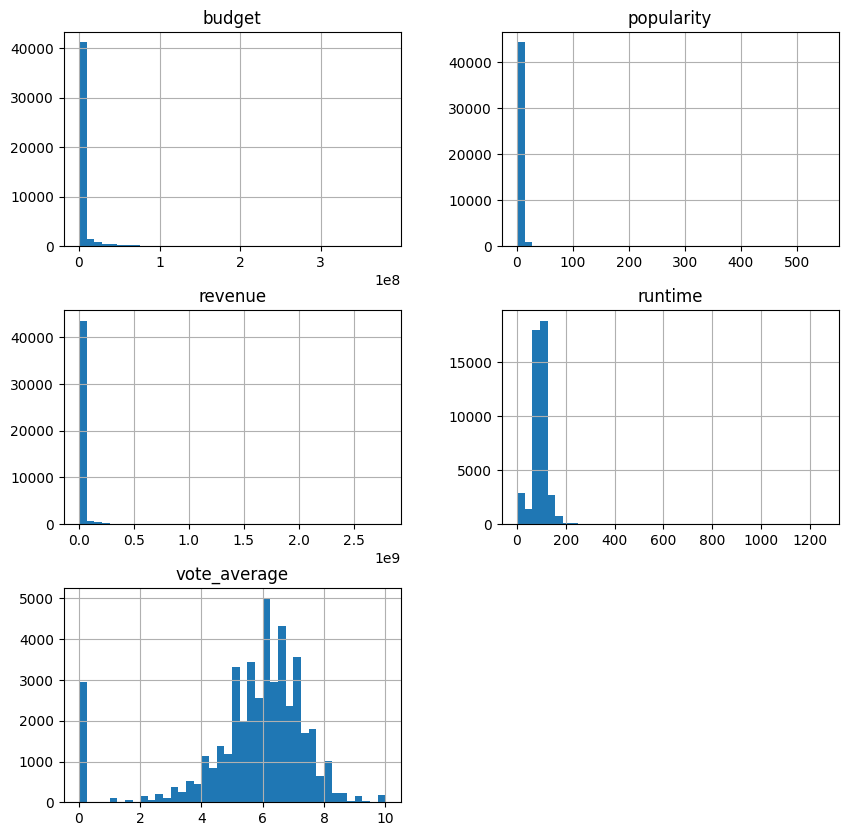

In [243]:
columnas = ['budget', 'popularity',	'revenue', 'runtime', 'vote_average']
df[columnas].hist(bins=40, figsize= (10, 10))
plt.show()

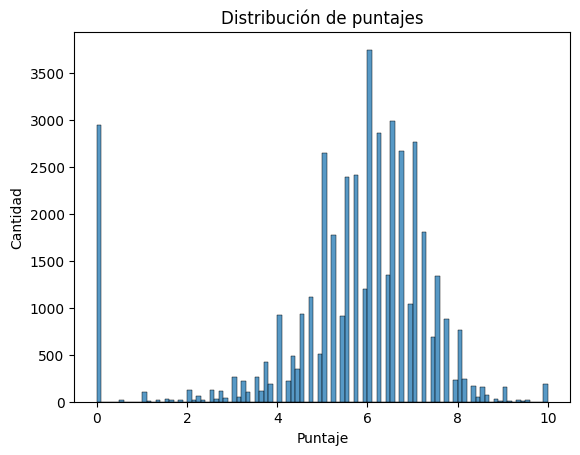

In [244]:
# Puntajes
sns.histplot(df['vote_average'])
plt.xlabel('Puntaje')
plt.ylabel('Cantidad')
plt.title('Distribución de puntajes')
plt.show()

In [245]:
# Los puntajes (vote_average) de las películas siguen aproximadamente una distribución normal

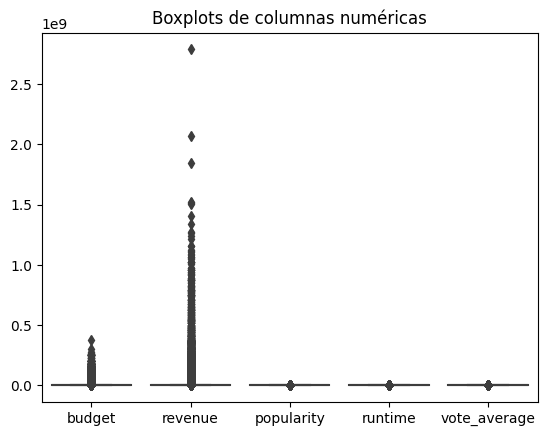

In [246]:
sns.boxplot(data=df[['budget', 'revenue', 'popularity', 'runtime', 'vote_average']])
plt.title('Boxplots de columnas numéricas')
plt.show()

In [247]:
# Se observan muchos outliers en presupuesto (budget) y ganancia (revenue). Evaluaremos la conveniencia de su filtrado para nuestro modelo de recomendación.

#### c) Correlaciones

C:\Users\Martina_2\AppData\Local\Temp\ipykernel_4224\4110412429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


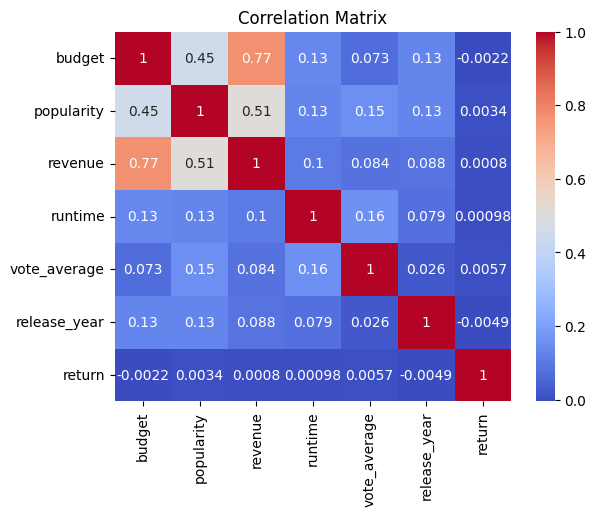

In [248]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [249]:
# Se visualiza una relación positiva entre la popularidad de la película y las ganancias como así también entre la popularidad y el presupuesto.
# También se observa una relación positiva entre presupuesto y ganancias pero su alto valor nos indica que se trata de una redundancia.
# No existe una correlación alta entre popularidad y puntaje

#### d) Fechas

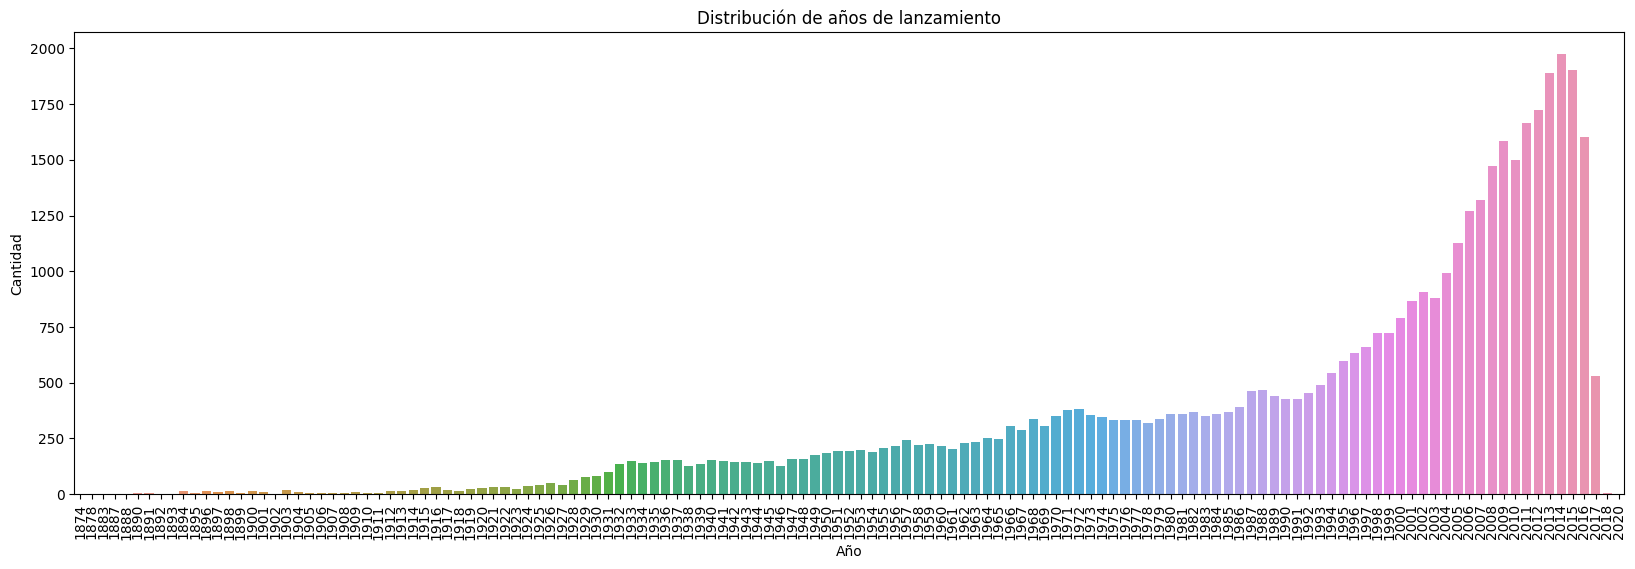

In [250]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='release_year')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Distribución de años de lanzamiento')
plt.xticks(rotation=90)
plt.show()


In [251]:
# Vemos como el número de películas por año aumentó con el paso del tiempo. Es a partir de 1990 que se observa un crecimiento exponencial en la cantidad de películas por año.

#### e) Géneros

In [252]:
import ast
# Convertimos la columna 'genres' de string a lista de diccionarios
df['genres'] = df['genres'].apply(ast.literal_eval)
# Extraemos el nombre de cada genero y cramos una nueva columna con la lista de nombres de generos
df['genre_names'] = df['genres'].apply(lambda x: [d['name'] for d in x])
# Expandimos la lista de nombres de géneros
generos_expandidos = df['genre_names'].explode()
# Contamos la frecuencia de cada valor en la columna 'genre_names'
conteo_generos = generos_expandidos.value_counts()
# Eliminamos los géneros que solo aparecen una vez
conteo_generos = conteo_generos[conteo_generos > 1]

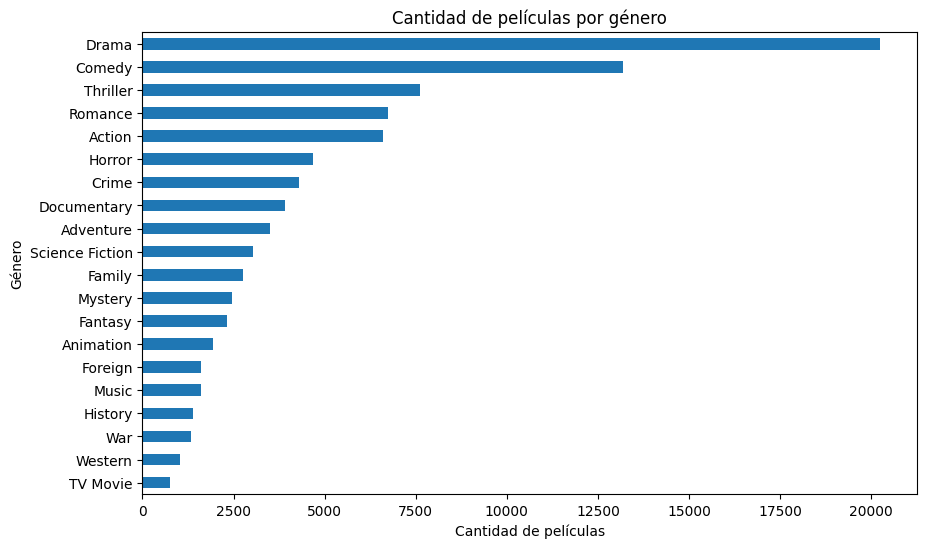

In [253]:
# Grafico para ver la cantidad de peliculas por genero
conteo_generos = conteo_generos.sort_values()  # Ordenamos los géneros por cantidad de películas

plt.figure(figsize=(10,6)) 
conteo_generos.plot(kind='barh')  # Creamos un gráfico de barras horizontales
plt.title('Cantidad de películas por género')  # Añadimos un título al gráfico
plt.xlabel('Cantidad de películas')  # Añadimos un título al eje x
plt.ylabel('Género')  # Añadimos un título al eje y
plt.show()  # Mostramos el gráfico

In [254]:
# Observamos que hay mayor cantidad de películas para la categoría Drama. Luego podemos observar una gran cantidad para el género Comedia, Thriller, Romance y Acción

#### f) Nubes de palabras

In [255]:
#pip install wordcloud

In [256]:
#pip show wordcloud

In [257]:
'''# Título de las películas
import wordcloud
from wordcloud import WordCloud

# Concatenar todos los títulos en un solo texto
text = ' '.join(df['overview'].dropna())

# Crear un objeto WordCloud y generar la nube de palabras
word_cloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()'''

"# Título de las películas\nimport wordcloud\nfrom wordcloud import WordCloud\n\n# Concatenar todos los títulos en un solo texto\ntext = ' '.join(df['overview'].dropna())\n\n# Crear un objeto WordCloud y generar la nube de palabras\nword_cloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)\n\n# Mostrar la nube de palabras\nplt.figure(figsize=(10, 6))\nplt.imshow(word_cloud, interpolation='bilinear')\nplt.axis('off')\nplt.title('Word Cloud of Titles')\nplt.show()"

### Modelo de recomendación Machine Learning

In [258]:
#pip install nltk

In [259]:
# Filtramos peliculas a partir de 1970
df = df[(df['release_year'] >= 1970)]

In [260]:
df.shape

(37087, 20)

In [261]:
# Convertir todos los valores en la columna 'overview' a strings
df['overview'] = df['overview'].astype(str)

In [262]:
# Concatenamos todas las descripciones de las películas en una sola cadena de texto
# Utilizamos astype para asegurarnos de que todos los valores son cadenas de texto
text = ' '.join(df['overview'].astype(str))

In [263]:
# Elimina los duplicados basándote en la columna 'title'
df = df.drop_duplicates(subset='title')

# Recrea el índice de los títulos luego de eliminar los duplicados
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

# Ahora puedes trabajar con df_sample que es una versión más pequeña de tus datos
df.shape

(34969, 20)

In [264]:
# Convierte las columnas a float
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

# Ordena por popularidad y toma las primeras 5000 filas
df_popular = df.sort_values(by='popularity', ascending=False).head(5000).reset_index(drop=True)

# Ordena por vote_average y toma las primeras 5000 filas
df_highly_rated = df.sort_values(by='vote_average', ascending=False).head(5000).reset_index(drop=True)

In [265]:
df_popular.shape

(5000, 20)

In [266]:
df_popular.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'release_year', 'return', 'genre_names'],
      dtype='object')

In [267]:
#df_popular = df_popular.sort_values(by='popularity', ascending=False).head(10000).reset_index(drop=True)

In [268]:
#df_highly_rated = df_highly_rated.sort_values(by='popularity', ascending=False).head(10000).reset_index(drop=True)

In [269]:
df_highly_rated.shape

(5000, 20)

In [270]:
df_highly_rated.to_csv('movies_ml.csv', index=False)

In [282]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import HashingVectorizer

# Aseguramos que los datos de la columna 'overview' sean strings
df_highly_rated['overview'] = df_highly_rated['overview'].fillna('').astype('str')

# Aseguramos que los datos de la columna 'genres' sean strings
df_highly_rated['genres'] = df_highly_rated['genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')

# Reemplazar los valores NaN con cadenas vacías en la columna 'production_companies'
df_highly_rated['production_companies'] = df_highly_rated['production_companies'].fillna('')

# Convertir la columna 'production_companies' a string si es necesario
df_highly_rated['production_companies'] = df_highly_rated['production_companies'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Crear una nueva columna combinando las características de interés
df_highly_rated['combined_features'] = df_highly_rated['overview'] + ' ' + df_highly_rated['genres'] + ' ' + df_highly_rated['production_companies']

# Convertimos todos los textos a minusculas para evitar duplicados
df_highly_rated['combined_features'] = df_highly_rated['combined_features'].str.lower()

# Inicializamos el HashingVectorizer
hash_vectorizer = HashingVectorizer(stop_words='english', n_features=2000)

# Transformamos los datos
hash_matrix = hash_vectorizer.fit_transform(df_highly_rated['combined_features'])

# Calculamos la similitud del coseno
cosine_sim = cosine_similarity(hash_matrix)

# Creamos un índice con los títulos de las películas
indices = pd.Series(df_highly_rated.index, index=df_highly_rated['title']).drop_duplicates()

In [283]:
def recomendacion(titulo, cosine_sim=cosine_sim):
    if titulo not in df_highly_rated['title'].values:
        return 'La película no se encuentra en el conjunto de datos de muestra.'
    else:
        # Obtenemos el índice de la película que coincide con el título
        idx = indices[titulo]

        # Obtenemos las puntuaciones de similitud de todas las películas con la película dada
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Ordenamos las películas en función de las puntuaciones de similitud
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Obtenemos las puntuaciones de las 5 películas más similares
        sim_scores = sim_scores[1:6]

        # Obtenemos los índices de las películas
        movie_indices = [i[0] for i in sim_scores]

        # Devolvemos las 5 películas más similares
        return df_highly_rated['title'].iloc[movie_indices]

In [284]:
print(recomendacion("Toy Story"))

2472                        Toy Story 3
4482                        Toy Story 2
164     Kizumonogatari Part 3: Reiketsu
3197                          Seclusion
4027         The Last: Naruto the Movie
Name: title, dtype: object


In [285]:
print(recomendacion("Jumanji"))

La película no se encuentra en el conjunto de datos de muestra.


In [286]:
print(recomendacion("Avatar"))

4424                             Longitude
4218                         Kal Ho Naa Ho
772                  Louis C.K.: Hilarious
2068                          Mission Blue
3147    Gifted Hands: The Ben Carson Story
Name: title, dtype: object


In [287]:
print(recomendacion("Titanic"))

877     The Legend of 1900
1395          Dustbin Baby
3082       A Quiet Passion
4570                 Sybil
2192          The Notebook
Name: title, dtype: object


In [288]:
print(recomendacion("Scarface"))

2835                 Cocaine Cowboys
3931       Cocaine Cowboys: Reloaded
934                   Pablo's Hippos
196     Freeway: Crack in the System
1953                         Chemsex
Name: title, dtype: object


In [ ]:
#optimizacion

In [279]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import HashingVectorizer

# Aseguramos que los datos de la columna 'overview' sean strings
df_highly_rated['overview'] = df_highly_rated['overview'].fillna('').astype('str')

# Aseguramos que los datos de la columna 'genres' sean strings
df_highly_rated['genres'] = df_highly_rated['genres'].str.join(' ')

# Reemplazar los valores NaN con cadenas vacías en la columna 'production_companies'
df_highly_rated['production_companies'] = df_highly_rated['production_companies'].str.join(' ')

# Convertir la columna 'production_companies' a string si es necesario
df_highly_rated['production_companies'] = df_highly_rated['production_companies'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Crear una nueva columna combinando las características de interés
df_highly_rated['combined_features'] = df_highly_rated['overview'] + ' ' + df_highly_rated['genres'] + ' ' + df_highly_rated['production_companies']

# Convertimos todos los textos a minusculas para evitar duplicados
df_highly_rated['combined_features'] = df_highly_rated['combined_features'].str.lower()

# Inicializamos el HashingVectorizer
hash_vectorizer = HashingVectorizer(stop_words='english', n_features=1000)

# Transformamos los datos
hash_matrix = hash_vectorizer.fit_transform(df_highly_rated['combined_features'])

# Calculamos la similitud del coseno
cosine_sim = cosine_similarity(hash_matrix, dense_output=False)

# Creamos un índice con los títulos de las películas
indices = pd.Series(df_highly_rated.index, index=df_highly_rated['title']).drop_duplicates()

In [280]:
def recomendacion(titulo, cosine_sim=cosine_sim):
    if titulo not in df_highly_rated['title'].values:
        return 'La película no se encuentra en el conjunto de datos de muestra.'
    else:
        # Obtenemos el índice de la película que coincide con el título
        idx = indices[titulo]

        # Obtenemos las puntuaciones de similitud de todas las películas con la película dada
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Ordenamos las películas en función de las puntuaciones de similitud
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Obtenemos las puntuaciones de las 5 películas más similares
        sim_scores = sim_scores[1:6]

        # Obtenemos los índices de las películas
        movie_indices = [i[0] for i in sim_scores]

        # Devolvemos las 5 películas más similares
        return df_highly_rated['title'].iloc[movie_indices]